# Banana Bot
## Samuel Horovatin, 11185403, sch923

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os, datetime
import math
import matplotlib.pyplot as plt

# General Network Constants
EPOCHS = 100
BATCH = 16
OPTIMIZER = 'adam'

# Data Imports Constants 
DATA_PATH = 'G:\\shoro\\OneDrive - Personal\\OneDrive\School\\2020-2021\\CMPT898\\CMPT898_Repo\\Project\\data\\bananas\\'
LABEL_PATH = "Estu.csv"
VALIDATION_SPLIT = 0.5
SEED = 1996
TARGET_SIZE = (224,224)
HEIGHT_SHIFT = 0.10
WIDTH_SHIFT = [-22,22]
ZOOM_RANGE  = 0.10 
K_FOLDS = 10

# Network Construction Constants
INPUT_SHAPE = (224,224,3)
CONV_DEPTH = 256 # Taken from https://github.com/potterhsu/easy-fpn.pytorch. Not 100% sure why it is 256...

def MRD(y_true, y_pred):
    return tf.keras.backend.sum(tf.keras.backend.abs(y_pred-y_true)/y_true)

def One_FVU(y_true, y_pred):
    y_mean = tf.keras.backend.mean(y_true)
    return 1 - (tf.keras.backend.sum(tf.keras.backend.square(y_true - y_pred)) / tf.keras.backend.sum(tf.keras.backend.square(y_true - y_mean)))

# As described by Kendall and Gal: https://proceedings.neurips.cc/paper/2017/hash/2650d6089a6d640c5e85b2b88265dc2b-Abstract.html
def Uncertainty_Loss(output_D, variance):
    def loss(y_true, y_pred):
        S_i = log(variance)
        return (1/output_D) * tf.math.reduce_sum(0.5 * tf.math.exp(-S_i) * tf.math.square(tf.norm(y_true - y_pred)) + 0.5 * S_i)
    return loss

METRICS = [MRD, One_FVU]
LOSS = Uncertainty_Loss

In [2]:
# Gets labels from label csv
data_label_df = pd.read_csv(LABEL_PATH)

# Create training and testing datasets
dat_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=VALIDATION_SPLIT,
    height_shift_range=HEIGHT_SHIFT,
    width_shift_range=WIDTH_SHIFT,
    zoom_range=ZOOM_RANGE,
    fill_mode="wrap"
)

train_datagen = dat_gen.flow_from_dataframe(
    dataframe=data_label_df,
    directory=DATA_PATH,
    x_col='File Name',
    y_col='Weight',
    target_size=TARGET_SIZE,
    batch_size=BATCH,
    class_mode='raw',
    shuffle=True,
    seed=SEED,
    subset='training'
)

valid_datagen = dat_gen.flow_from_dataframe(
    dataframe=data_label_df,
    directory=DATA_PATH,
    x_col='File Name',
    y_col='Weight',
    target_size=TARGET_SIZE,
    batch_size=BATCH,
    class_mode='raw',
    shuffle=True,
    seed=SEED,
    subset="validation"
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = test_datagen.flow_from_dataframe(
    dataframe=data_label_df,
    directory=DATA_PATH,
    x_col='File Name',
    y_col='Weight',
    target_size=TARGET_SIZE,
    batch_size=BATCH,
    class_mode='raw',
    shuffle=True,
    seed=SEED
)

Found 285 validated image filenames.
Found 284 validated image filenames.
Found 569 validated image filenames.


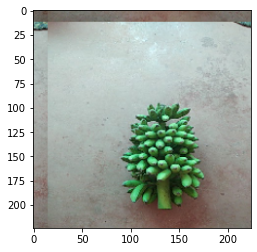

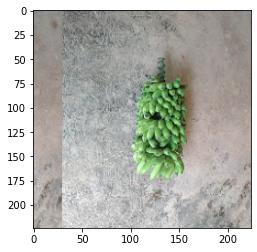

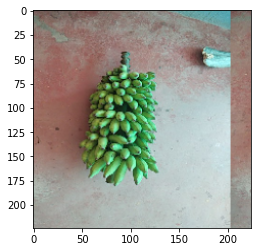

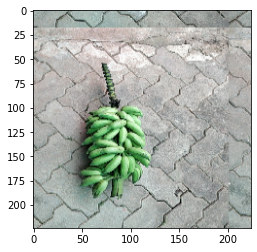

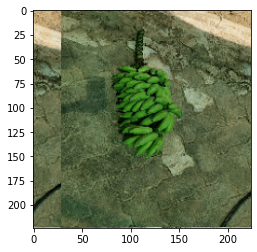

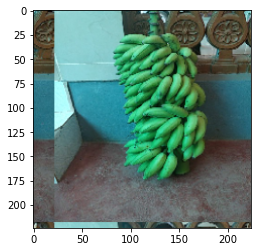

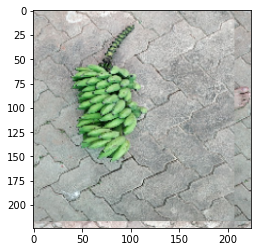

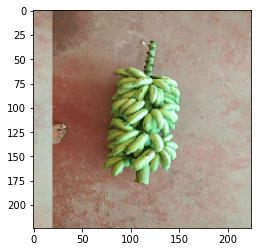

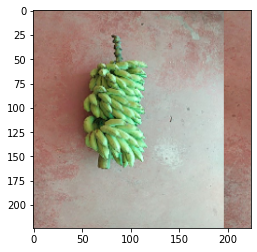

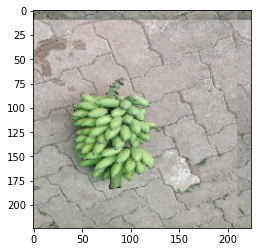

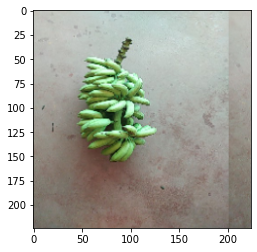

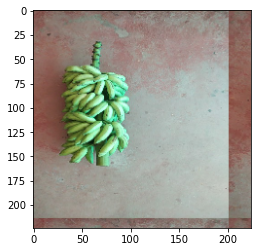

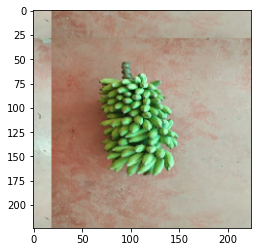

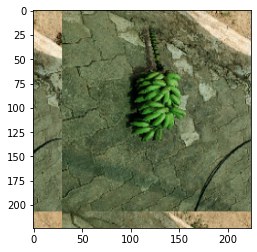

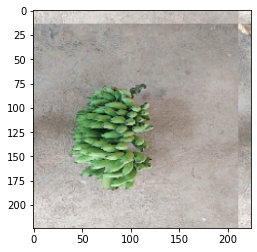

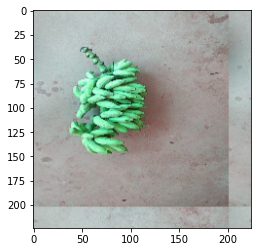

In [3]:
x_batch, y_batch = next(train_datagen)

# prints out a sample of the regularized images
for i in range (0,16):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

In [3]:
# Trains the model given the constant parameters and returns the model and the fit history
def Train_Model(model, train_datagen, test_datagen, valid_datagen):
  model.compile(optimizer=OPTIMIZER,
                loss=LOSS,
                metrics=METRICS)

  csv_logger = tf.keras.callbacks.CSVLogger('training.log', separator=',')
  # early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.03, mode='min', patience=8)

  STEP_SIZE_TRAIN=train_datagen.n//train_datagen.batch_size
  STEP_SIZE_VALID=valid_datagen.n//valid_datagen.batch_size
  STEP_SIZE_TEST=test_datagen.n//test_datagen.batch_size

  history = model.fit(x=train_datagen,
                      steps_per_epoch=STEP_SIZE_TRAIN,
                      validation_data=valid_datagen,
                      validation_steps=STEP_SIZE_VALID, 
                      epochs=EPOCHS,
                      callbacks=[csv_logger])
        
  return (model, history)

In [4]:
# Takes in an model and returns a list of edges last layers name in a block
# Layers within blocks need to be named with '*block#*' were # is the block number
def blockEdgeNameFinder(model):
    layer_index = 0 # This allows the function to skip the start of the network
    current_block = "block"
    block_edges = []
    last_layer_name = ""

    for layer in model.layers:
        if current_block in layer.name:
            if layer_index == 0:
                layer_index = layer_index + 1
                current_block = f"block{layer_index}"
                
        elif layer_index == 0:
            continue
        
        elif "block" in last_layer_name:
            layer_index = layer_index + 1
            next_block = f"block{layer_index}"
            current_block = next_block
            block_edges.append(last_layer_name)

        last_layer_name = layer.name

    return block_edges

In [5]:

def EfficentNet(B_lvl):
    basemodel = tf.keras.applications.EfficientNetB0(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')

    if B_lvl == 'B0' or B_lvl == 0:
        return build_EfficentNet_B0(basemodel)
    elif B_lvl == 'B1' or B_lvl == 1:
        print(f"EfficentNet Error: Level {B_lvl} unimplemented.")
    elif B_lvl == 'B2' or B_lvl == 2:
        print(f"EfficentNet Error: Level {B_lvl} unimplemented.")
    elif B_lvl == 'B3' or B_lvl == 3:
        print(f"EfficentNet Error: Level {B_lvl} unimplemented.")
    elif B_lvl == 'B4' or B_lvl == 4:
        print(f"EfficentNet Error: Level {B_lvl} unimplemented.")
    elif B_lvl == 'B5' or B_lvl == 5:
        print(f"EfficentNet Error: Level {B_lvl} unimplemented.")
    elif B_lvl == 'B6' or B_lvl == 6:
        print(f"EfficentNet Error: Level {B_lvl} unimplemented.")
    elif B_lvl == 'B7' or B_lvl == 7:
        print(f"EfficentNet Error: Level {B_lvl} unimplemented")
    else:
        print(f"EfficentNet Error: Unknown efficentnet level {B_lvl}")

def build_EfficentNet_B0(basemodel):
    FPN_LAYER_NAMES = blockEdgeNameFinder(basemodel)
    backbone = []
    FPN_LAYER_NAMES = FPN_LAYER_NAMES[2:]
    FPN_LAYER_NAMES = FPN_LAYER_NAMES[::-1] 

    for name in FPN_LAYER_NAMES: 
        backbone.append(basemodel.get_layer(name).output)

    layer_outputs = []
    first_layer = True
    layer_index = 7
    for layer in backbone: 
        # FPN consolidation
        FPN_layer = tf.keras.layers.Conv2D(filters=CONV_DEPTH, kernel_size=(1,1), name=f"fpn{layer_index}_conv")(layer) 
        if not first_layer:
            A = last_FPN_layer.shape[1:][1]
            B = FPN_layer.shape[1:][1] # All layers should be square resolution
            scale = int(round(B/A))
            last_FPN_layer = tf.keras.layers.UpSampling2D((scale,scale), name=f"fpn{layer_index}_scale{scale}")(last_FPN_layer)
            FPN_layer = tf.keras.layers.Add(name=f"fpn{layer_index}_add")([FPN_layer, last_FPN_layer])
            
        else:
            first_layer = False
        last_FPN_layer = FPN_layer
        layer_outputs.append(FPN_layer)
        layer_index = layer_index - 1 
    
    return tf.keras.models.Model(inputs=basemodel.inputs, outputs=layer_outputs[-1], name="EfficentNet+FPN")

test_model = tf.keras.applications.EfficientNetB0(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')    
build_EfficentNet_B0(test_model).summary()


Model: "EfficentNet+FPN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
____________________________________________________________________________________

In [33]:
# Disconnected graph. Have to put into one big gross long chain in the build_EfficentNet_B0
def Add_Regression_Top(model, name):
    options = {
        'activation'         : 'relu',
        'kernel_initializer' : tf.keras.initializers.HeNormal()
    }
    outputs = tf.keras.layers.Conv2D(
        256,
        model.shape[1:3],
        activation = options['activation'],
        kernel_initializer= options['kernel_initializer'], 
        name=f'{name}_conv1_256'
    )(model)
    outputs = tf.keras.layers.Conv2D(
        256,
        outputs.shape[1:3],
        activation = options['activation'],
        kernel_initializer= options['kernel_initializer'], 
        name=f'{name}_conv2_256'
    )(outputs)

    outputs = tf.keras.layers.GlobalAveragePooling2D()(outputs)
    outputs = tf.keras.layers.Dense(
        256,
        activation = options['activation'],
        kernel_initializer= options['kernel_initializer'], 
        name=f'{name}_dense_256'
    )(outputs)

    outputs = tf.keras.layers.Dense(
        128,
        activation = options['activation'],
        kernel_initializer= options['kernel_initializer'], 
        name=f'{name}_dense_128'
    )(outputs)

    outputs = tf.keras.layers.Dense(
        64,
        activation = options['activation'],
        kernel_initializer= options['kernel_initializer'], 
        name=f'{name}_dense_64'
    )(outputs)

    outputs = tf.keras.layers.Dense(
        2, 
        kernel_initializer= options['kernel_initializer'],
        name=f'{name}_dense_out'
    )(outputs)

    return outputs



# Takes in an model and returns a list of edges between block
# Layers within blocks need to be labeled with block names 'block#*' were # is the block number
def blockEdgeNameFinder(model):
    layer_index = 0 # This allows the function to skip the start of the network
    current_block = "block"
    block_edges = []
    last_layer_name = ""

    for layer in model.layers:
        if current_block in layer.name:
            if layer_index == 0:
                layer_index = layer_index + 1
                current_block = f"block{layer_index}"
                
        elif layer_index == 0:
            continue

        elif "block" in last_layer_name:
            layer_index = layer_index + 1
            next_block = f"block{layer_index}"
            current_block = next_block
            block_edges.append(last_layer_name)
        last_layer_name = layer.name

    return block_edges

basemodel = tf.keras.applications.EfficientNetB0(input_shape=INPUT_SHAPE, include_top=False, weights='imagenet')
names = blockEdgeNameFinder(basemodel)
backbone = []
names = names[2:]
names = names[::-1] 

for name in names: 
     backbone.append(basemodel.get_layer(name).output)

layer_outputs = []
first_layer = True
layer_index = 7
for layer in backbone: 
    # FPN consolidation
    FPN_layer = tf.keras.layers.Conv2D(filters=CONV_DEPTH, kernel_size=(1,1), name=f"fpn{layer_index}_conv")(layer) 
    if not first_layer:
        A = last_FPN_layer.shape[1:][1]
        B = FPN_layer.shape[1:][1] # All layers should be square resolution
        scale = int(round(B/A))
        last_FPN_layer = tf.keras.layers.UpSampling2D((scale,scale), name=f"fpn{layer_index}_scale{scale}")(last_FPN_layer)
        FPN_layer = tf.keras.layers.Add(name=f"fpn{layer_index}_add")([FPN_layer, last_FPN_layer])
        
    else:
        first_layer = False
    last_FPN_layer = FPN_layer
    layer_outputs.append(Add_Regression_Top(FPN_layer, f"fpn_reg{layer_index}")[1])
    layer_index = layer_index - 1

class WeightedAverage(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(WeightedAverage, self).__init__(**kwargs)

    def call(self, model_outputs):
        # based on the wikipedia page for weighted variance average
        estimates = tf.gather_nd(model_outputs[0], [0])
        variances = tf.gather_nd(model_outputs[0], [1])
        for i in range(1, len(model_outputs)):
            print(f"START {i}") # HAVE TO FIX THIS
            new_estimate = tf.convert_to_tensor(tf.gather_nd(model_outputs[i], [0]))
            new_variance = tf.convert_to_tensor(tf.gather_nd(model_outputs[i], [1]))
            estimates = tf.keras.layers.concatenate([estimates, new_estimate],axis=0)
            new_variance = tf.keras.layers.concatenate([variances, new_variance],axis=0)
            print(f"END {i}")

        
        weighted_avg = tf.math.reduce_sum(tf.math.divide(estimates, variances))
        avg_variance = tf.math.reduce_mean(variances)
    
        return avg_variance * weighted_avg

print(f"layer_outputs {layer_outputs}")
final_layer = WeightedAverage()(layer_outputs)
print(f"{final_layer}")

layer_outputs [<tf.Tensor 'strided_slice_70:0' shape=(2,) dtype=float32>, <tf.Tensor 'strided_slice_71:0' shape=(2,) dtype=float32>, <tf.Tensor 'strided_slice_72:0' shape=(2,) dtype=float32>, <tf.Tensor 'strided_slice_73:0' shape=(2,) dtype=float32>, <tf.Tensor 'strided_slice_74:0' shape=(2,) dtype=float32>]
START1


StagingError: in user code:

    <ipython-input-33-87619b2dcfa6>:120 call  *
        estimates = tf.keras.layers.concatenate([estimates, new_estimate],axis=0)
    G:\Users\shoro\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\layers\merge.py:931 concatenate  **
        return Concatenate(axis=axis, **kwargs)(inputs)
    G:\Users\shoro\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:926 __call__
        input_list)
    G:\Users\shoro\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1098 _functional_construction_call
        self._maybe_build(inputs)
    G:\Users\shoro\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:2643 _maybe_build
        self.build(input_shapes)  # pylint:disable=not-callable
    G:\Users\shoro\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\utils\tf_utils.py:323 wrapper
        output_shape = fn(instance, input_shape)
    G:\Users\shoro\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\layers\merge.py:500 build
        del reduced_inputs_shapes[i][self.axis]

    IndexError: list assignment index out of range


In [21]:
t1 = tf.constant([2.0, 3.0])
t2 = tf.constant([4.0, 5.0])
estimates = tf.gather_nd(t1, [0])
variances = tf.gather_nd(t1, [1])
estimates = tf.concat([estimates,tf.gather_nd(t2 , [0])], axis=0)
print(estimates)



tf.Tensor([2. 4.], shape=(2,), dtype=float32)
